In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

simulations = np.load('simulations.npy')

In [16]:
# Function to simulate the effect on investment
def simulate_investment(initial_investment, percent_changes, doubling_down_threshold):
    doubling_down_threshold += 1
    investment = initial_investment
    values = np.zeros(len(percent_changes) + 1)
    values[0] = investment
    double_down_count = 0
    
    for i, percent_change in enumerate(percent_changes):
        investment *= percent_change
        
        if percent_change < doubling_down_threshold:
            # Double down on the investment
            investment += initial_investment
            double_down_count += 1
        
        values[i+1] = investment
    
    return values



In [33]:
%%time

# Parameters
initial_investment = 100
doubling_down_threshold = -0.2  #threshold for doubling down on losses

# Keep track of final values
final_values = []

# Simulate the effect on investment for each series
simulated_investments = []
for series in simulations[:100000]:
    simulated_investments_i = simulate_investment(initial_investment, series, doubling_down_threshold)
    simulated_investments.append(simulated_investments_i)
    final_values.append(simulated_investments_i[-1])
    

CPU times: user 15.2 s, sys: 404 ms, total: 15.6 s
Wall time: 15.8 s


In [34]:
for series in simulated_investments:
    plt.plot(series)

plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x10778b9d0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x361a863a0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

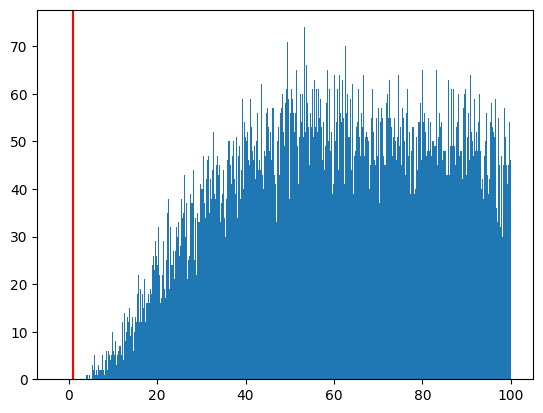

In [61]:
arr = final_values

plt.hist(arr, bins=1000, range=[-2,100])
plt.axvline(x=1, color='red')

plt.show()

In [ ]:
pc_changes = np.zeros(len(simulations))

for i in range(len(simulations)):
    row = simulations[i]
    pc_changes[i] = np.prod(row)
    

plt.hist(pc_changes, bins=1000)

plt.show()



In [ ]:
pd.DataFrame(pc_changes).describe()

In [63]:
# arr = pc_changes

# value = 1

# # Count numbers below the value
# below_count = np.sum(arr < value)

# # Count numbers above the value
# above_count = np.sum(arr > value)

# # print("Numbers below", value, ":", below_count)
# # print("Numbers above", value, ":", above_count)

# frequency_below = below_count / len(arr)
# frequency_above = above_count / len(arr)

# print(f"{frequency_above=:.0%}\n{frequency_below=:.0%}")